In [2]:
import json
import math
import keras_cv
import tensorflow as tf
import tensorflow_datasets as tfds
import keras
from keras import losses
import numpy as np
from keras import metrics
import matplotlib.pyplot as plt

2024-12-22 18:04:56.960614: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-22 18:04:57.126484: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734858297.196832    6494 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734858297.217322    6494 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-22 18:04:57.379363: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [3]:
!wget -nc https://archive.org/download/lions_cheetahs/lions_cheetahs.zip

File ‘lions_cheetahs.zip’ already there; not retrieving.



In [4]:
!unzip -nq lions_cheetahs.zip

In [5]:
!ls

'computer vision 1 classification.ipynb'   images
'Fine_tuning 2.ipynb'			   lions_cheetahs.zip


In [6]:
!ls images 
# we need to train-validation split manually
# confirm folder structure

Cheetahs  Lions


In [7]:
!ls images/Cheetahs/

0052cb267268c59e.jpg  0c20fa69621a2e6c.jpg  4d5ff3bad0444108.jpg
00707659aba29334.jpg  0c61b8d86a3e0889.jpg  519587ae1f0b5160.jpg
007f9ffc01c7b106.jpg  0c6e90e19f2b2bbc.jpg  5233078010f25f0c.jpg
00bb45a8568a3474.jpg  0db6601682a368e8.jpg  52b64d96fc0647e8.jpg
00c8d36882dd6d37.jpg  0fb021bac7207533.jpg  601c4f42bfb9c50d.jpg
00d100b0231b60e6.jpg  11377ee99115ffff.jpg  6795bb2c553f4981.jpg
00d9eb862ba3dfc6.jpg  113fbf2203ccef57.jpg  6d613ea1b58411f1.jpg
012f5ecbf49e1da0.jpg  1140e3015190cfeb.jpg  75ea322880cfcc3a.jpg
01750ba1a197e3ad.jpg  11c270e6589dce6e.jpg  767e3c2968ff1890.jpg
01d688c043bdbfbb.jpg  12271a9ed07dc28e.jpg  775f869903916081.jpg
0230496e4a8ed917.jpg  135b67b72eb7bb47.jpg  784940fed90cccc2.jpg
02871f24d5abe59c.jpg  13626a8bd4c27b49.jpg  7f33de86429cef7f.jpg
029b39c0b65ebeb3.jpg  13cec8f6c995afba.jpg  8b48ed579956d124.jpg
02a0439923768403.jpg  150bf6ac5d17ed58.jpg  8f34ab7a9b7a8f9b.jpg
02a5846a35629f1d.jpg  177a51628b923b71.jpg  9a470427f0a875d2.jpg
02b086c4e96396f6.jpg  1be

In [14]:
train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(
    'images', 
    image_size=(224, 224),
    validation_split=0.3, 
    subset='both', 
    seed=123
)

Found 219 files belonging to 2 classes.
Using 154 files for training.
Using 65 files for validation.


In [15]:
train_ds


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [16]:
val_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [11]:
train_ds = train_ds.shuffle(10 * 32, reshuffle_each_iteration=True)

In [12]:
for batch in train_ds.take(1):
    images, labels = batch
    print(images.shape)  # Should be (batch_size, height, width, channels)
    print(images.dtype)  # Should be a numeric data type (e.g., float32)
    print(labels.shape)  # Verify label structure


(32, 224, 224, 3)
<dtype: 'float32'>
(32,)


2024-12-22 18:05:03.459991: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


(32, 224, 224, 3)


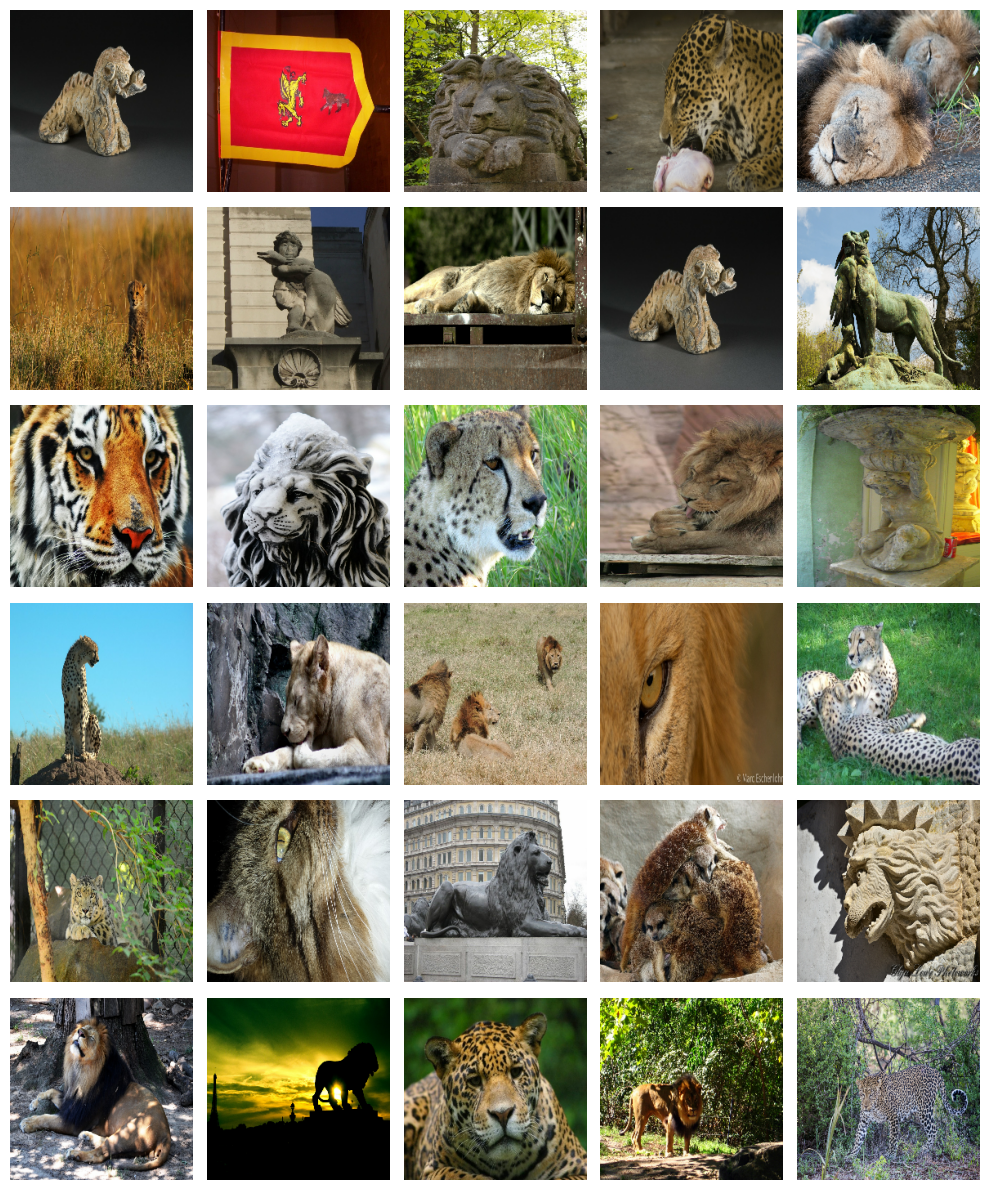

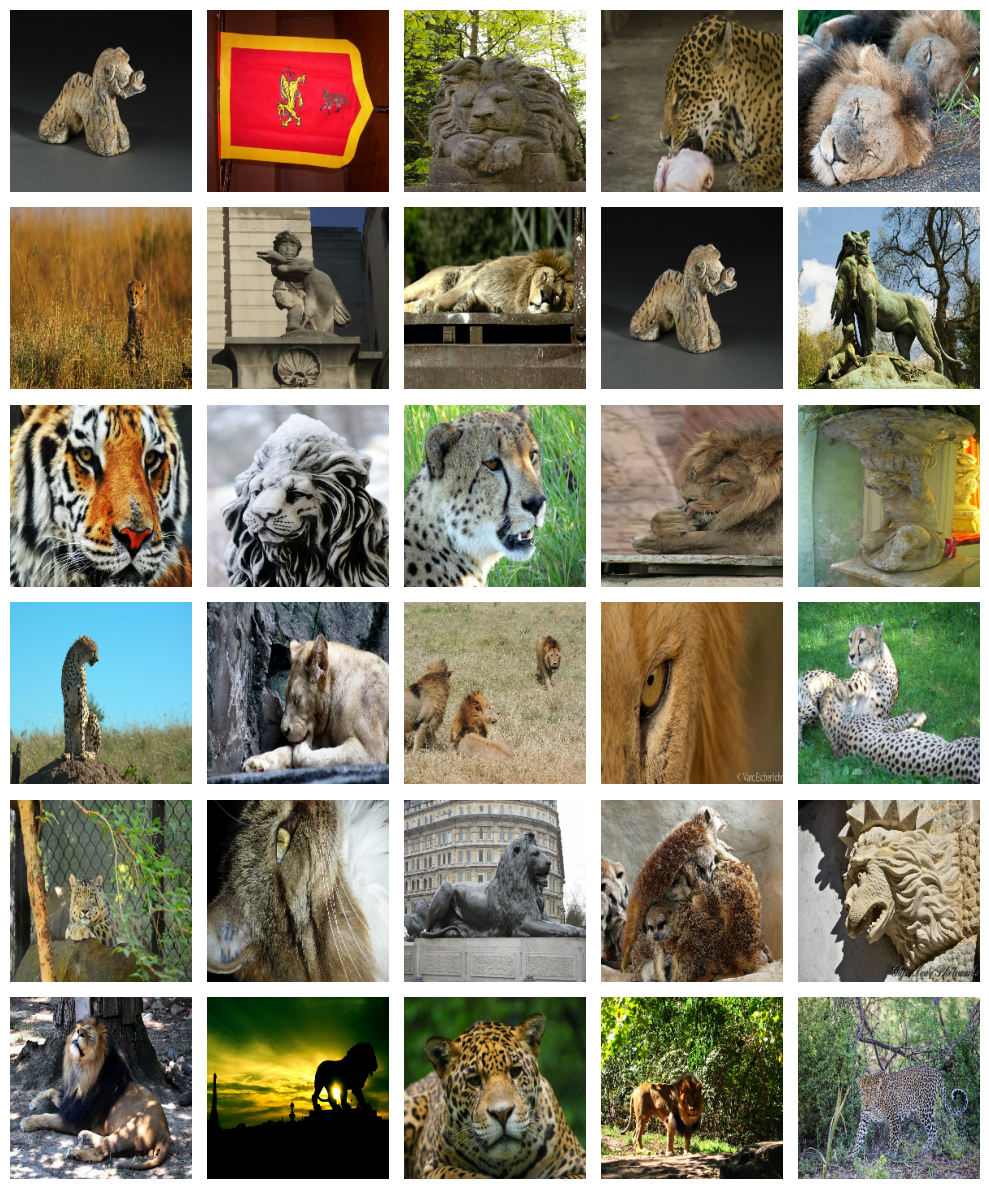

In [17]:
images = next(iter(train_ds.take(1)))[0]
print(images.shape)
keras_cv.visualization.plot_image_gallery(images, value_range=(0, 255))

In [18]:
model = keras_cv.models.ImageClassifier.from_preset("efficientnetv2_b0_imagenet", num_classes=2)
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=tf.keras.optimizers.AdamW(),
    metrics=['accuracy'],
)

100%|██████████████████████████████████████| 1.79k/1.79k [00:00<00:00, 4.78MB/s]


100%|██████████████████████████████████████| 23.1M/23.1M [00:02<00:00, 9.08MB/s]


In [19]:
r = model.fit(train_ds, validation_data = val_ds, epochs=10)

Epoch 1/10


I0000 00:00:1734859815.883228    6716 service.cc:148] XLA service 0x7bcf00013c00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1734859815.888564    6716 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2024-12-22 18:30:17.241394: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1734859821.780282    6716 cuda_dnn.cc:529] Loaded cuDNN version 90600
2024-12-22 18:30:27.434108: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_27892', 144 bytes spill stores, 144 bytes spill loads

2024-12-22 18:30:27.534087: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2

4/5 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - accuracy: 0.6491 - loss: 0.6360

2024-12-22 18:31:19.832944: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_27892', 100 bytes spill stores, 100 bytes spill loads

2024-12-22 18:31:19.922520: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_27892', 248 bytes spill stores, 248 bytes spill loads



5/5 ━━━━━━━━━━━━━━━━━━━━ 150s 15s/step - accuracy: 0.6860 - loss: 0.6068 - val_accuracy: 0.8462 - val_loss: 0.3320
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 183ms/step - accuracy: 0.9601 - loss: 0.1854 - val_accuracy: 0.9385 - val_loss: 0.1890
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 181ms/step - accuracy: 0.9848 - loss: 0.0813 - val_accuracy: 0.9077 - val_loss: 0.1662
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 185ms/step - accuracy: 0.9900 - loss: 0.0441 - val_accuracy: 0.9692 - val_loss: 0.0733
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 182ms/step - accuracy: 1.0000 - loss: 0.0121 - val_accuracy: 0.9538 - val_loss: 0.1152
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 179ms/step - accuracy: 0.9978 - loss: 0.0124 - val_accuracy: 0.9692 - val_loss: 0.1193
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 185ms/step - accuracy: 1.0000 - loss: 0.0066 - val_accuracy: 0.9538 - val_loss: 0.1055
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 180ms/step - accuracy: 1.0000 - loss: 0.0096 - val_accuracy: 0.9538 - val_loss: 0.0945
Epo

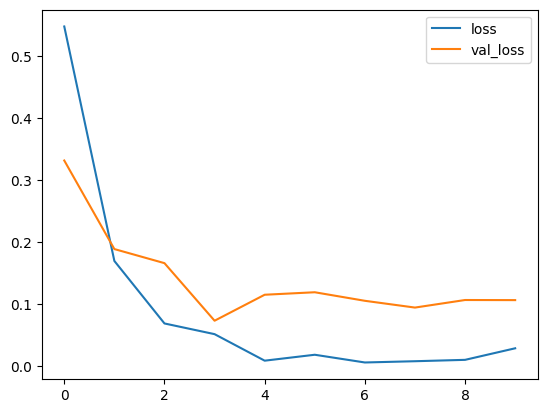

In [21]:
plt.plot(r.history['loss'], label= 'loss')
plt.plot(r.history['val_loss'], label= 'val_loss')
plt.legend();

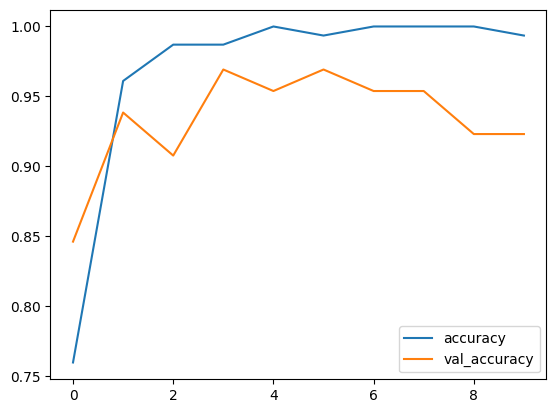

In [22]:
plt.plot(r.history['accuracy'], label= 'accuracy')
plt.plot(r.history['val_accuracy'], label= 'val_accuracy')
plt.legend();

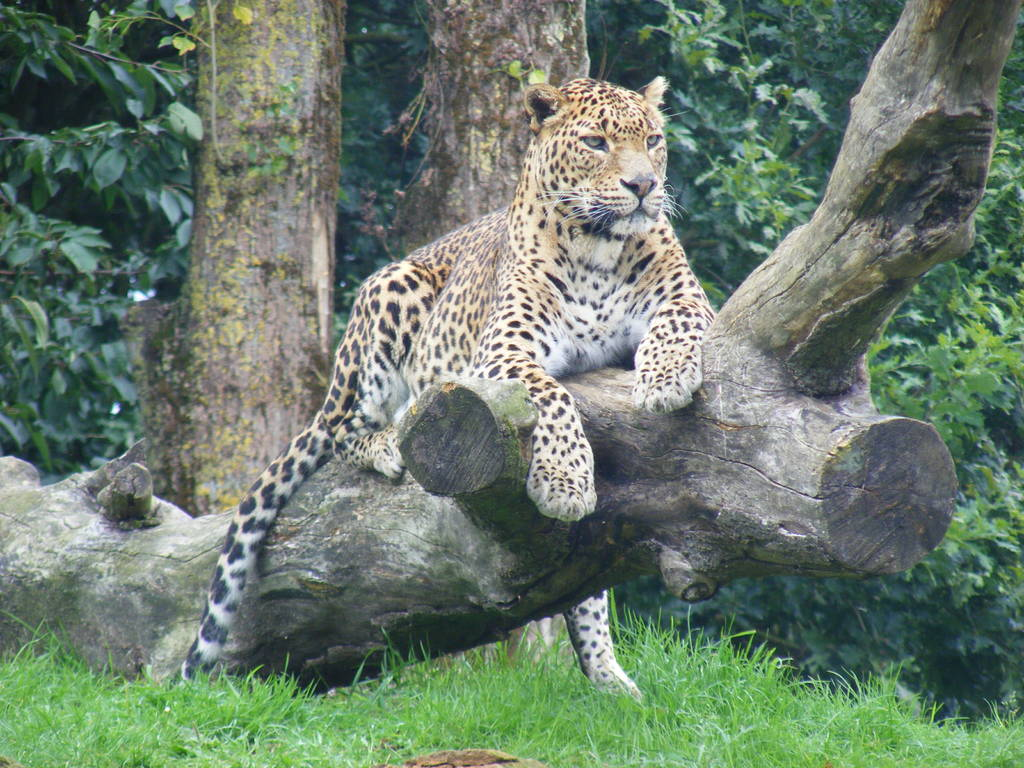

In [24]:
from PIL import Image

path = 'images/Cheetahs/ed51aa4321f10a21.jpg'
im = Image.open(path)
im


In [25]:
type(im)

PIL.JpegImagePlugin.JpegImageFile

In [26]:
np_im = np.asarray(im)
np_im.shape

(768, 1024, 3)

In [28]:
resizing = keras_cv.layers.Resizing(224, 224, crop_to_aspect_ratio=True)

In [29]:
resizing

<Resizing name=resizing, built=True>

In [30]:
np_im_rs = resizing(np_im)
np_im_rs

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[ 42.4949  ,  56.209183,  51.94388 ],
        [ 46.663265,  72.81122 ,  58.234695],
        [ 96.311226, 133.68367 , 116.34183 ],
        ...,
        [ 55.928608,  80.35718 ,  83.14293 ],
        [ 55.07668 ,  78.22461 ,  86.28593 ],
        [ 59.423473,  82.06633 ,  94.39796 ]],

       [[ 43.42347 ,  82.5     ,  41.918365],
        [ 77.63775 , 119.20918 ,  90.051025],
        [105.90306 , 146.36224 , 133.7857  ],
        ...,
        [ 34.734688,  66.0204  ,  52.806118],
        [ 48.82666 ,  80.11237 ,  67.61237 ],
        [ 42.872494,  74.15821 ,  61.658207]],

       [[ 79.239784, 122.85713 ,  74.27039 ],
        [ 80.67346 , 127.244896,  73.959175],
        [ 69.41837 , 117.34694 ,  66.19387 ],
        ...,
        [ 47.051003,  79.12243 ,  63.979576],
        [ 28.734863,  66.52058 ,  43.592007],
        [ 49.852028,  89.311195,  63.979588]],

       ...,

       [[133.6836  , 191.75505 , 139.541   ],
        [ 93.

In [31]:
np_im_rs.shape

TensorShape([224, 224, 3])

In [32]:
x = tf.reshape(np_im_rs, (1,224, 224, 3))

In [33]:
out = model.predict

In [34]:
out

<bound method TensorFlowTrainer.predict of <ImageClassifier name=image_classifier, built=True>>